In [154]:
import tensorflow as tf

In [155]:
print(tf.__version__)

2.6.0


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [157]:
documentName = 'chatriotgames101821'
folderName = '/ChatLogs/chatriotgames/'

In [158]:
df = pd.read_csv('..'+ folderName + documentName + 'AverageMinute' + '.csv')
df2 = pd.read_csv('..'+ folderName + documentName + 'Average30Second' + '.csv')
df3 = pd.read_csv('..'+ folderName + documentName + 'Average10Second' + '.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        58 non-null     object 
 1   comp_score  58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        116 non-null    object 
 1   comp_score  116 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [166]:
df30 = pd.read_csv('C:/Users/Gustavo Chinchayan/Documents/Python/DLD/DS_Files/ChatLogs/chatriotgames/chatriotgames101821Average30Second.csv', index_col='Date')

In [179]:
df30

,comp_score
Date,
2021-10-18 17:18:00,0.147404
2021-10-18 17:18:30,0.056627
2021-10-18 17:19:00,0.008208
2021-10-18 17:19:30,0.033074
2021-10-18 17:20:00,0.022255
...,...
2021-10-18 18:13:30,0.002853
2021-10-18 18:14:00,-0.157733
2021-10-18 18:14:30,-0.137838


In [180]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 2021-10-18 17:18:00 to 2021-10-18 18:15:30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comp_score  116 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [188]:
df30.index = pd.DatetimeIndex(df30.index)
df30.index = df30.index.time

In [189]:
df30

,comp_score
17:18:00,0.147404
17:18:30,0.056627
17:19:00,0.008208
17:19:30,0.033074
17:20:00,0.022255
...,...
18:13:30,0.002853
18:14:00,-0.157733
18:14:30,-0.137838
18:15:00,-0.093781


<AxesSubplot:>

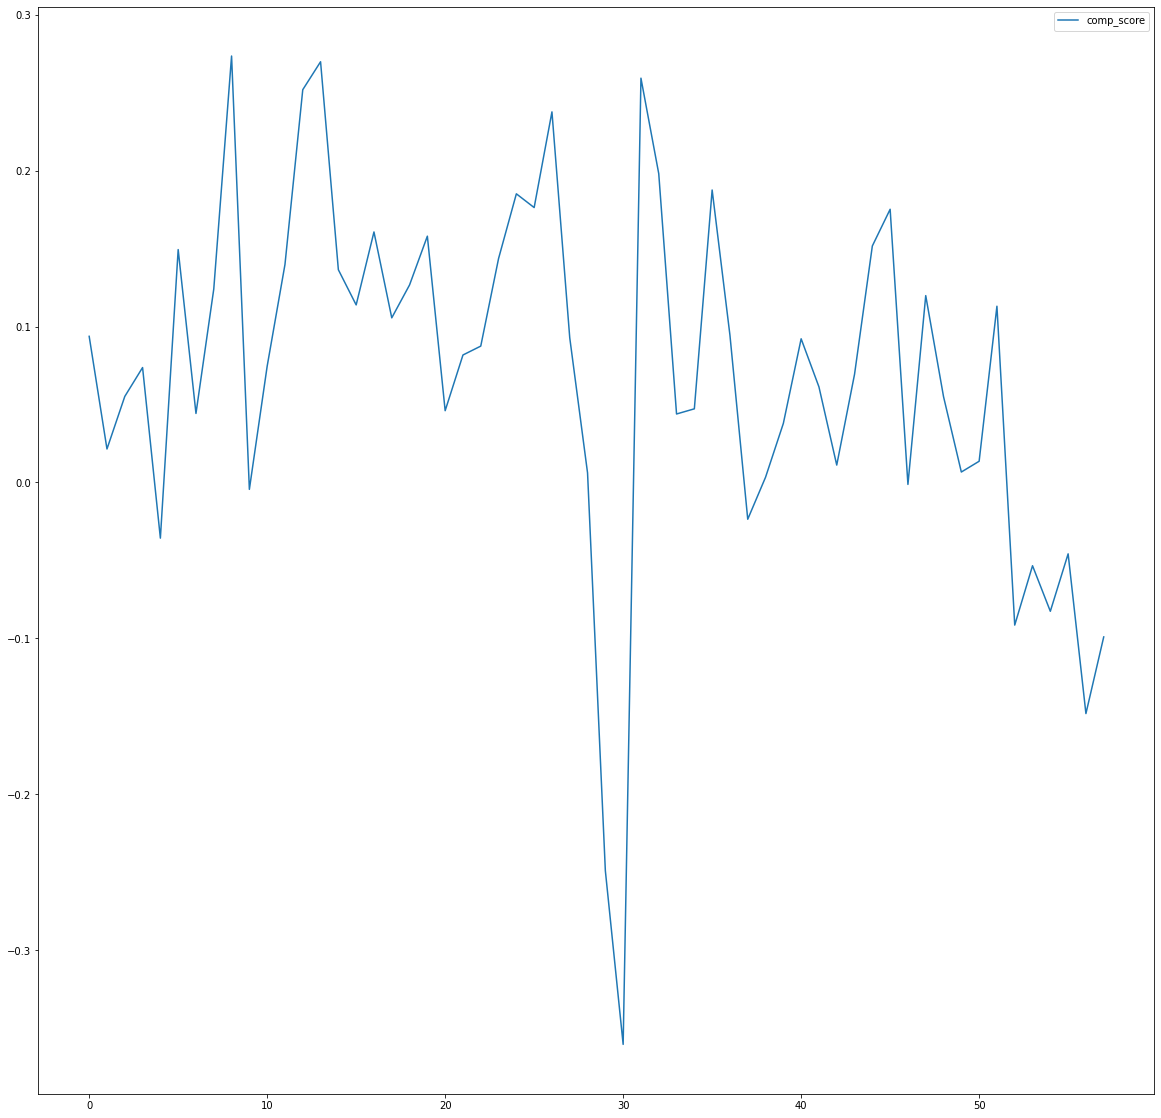

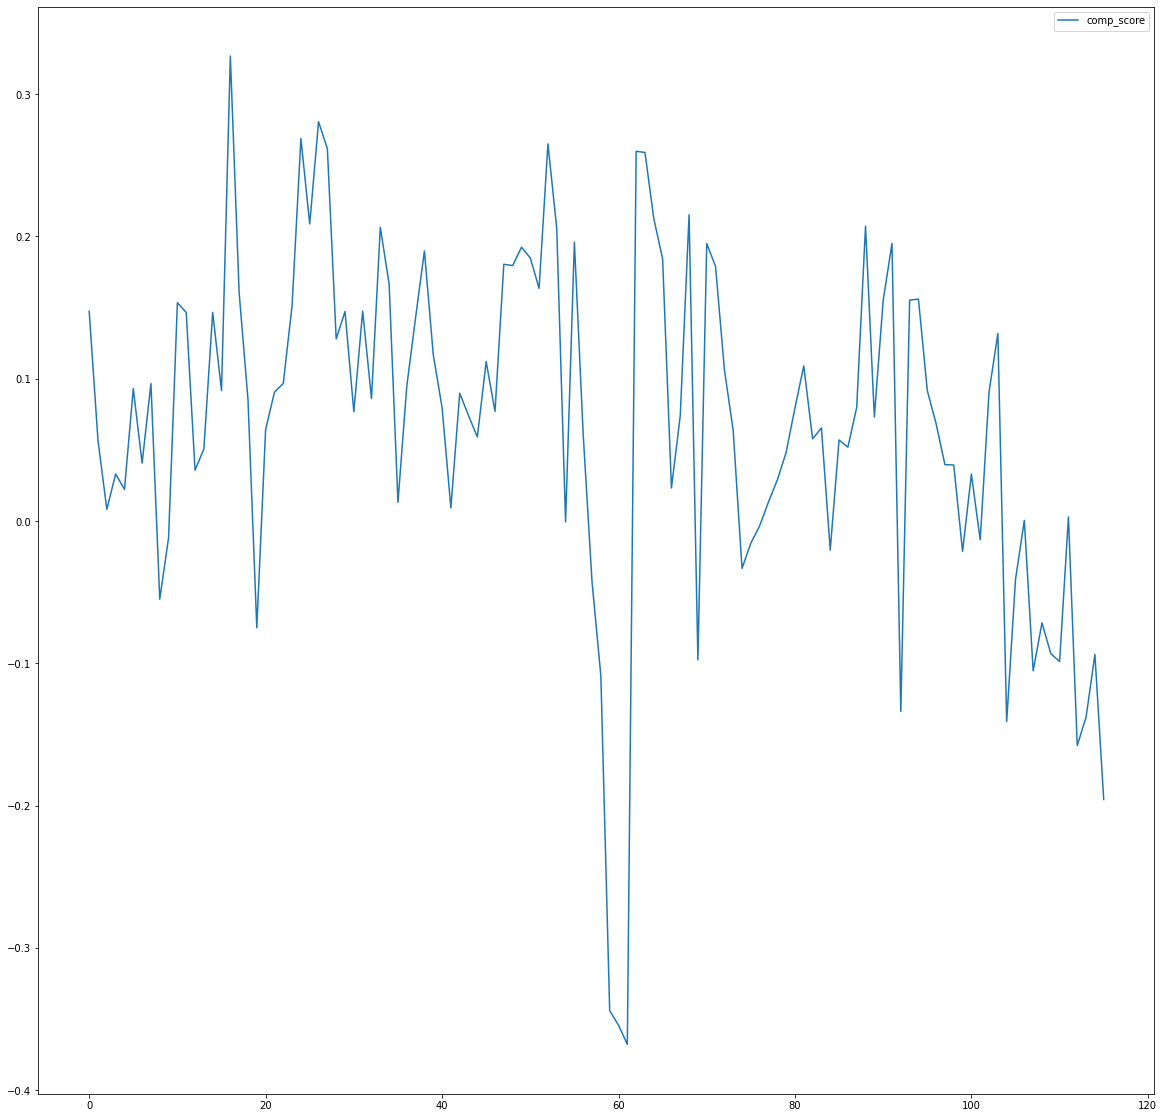

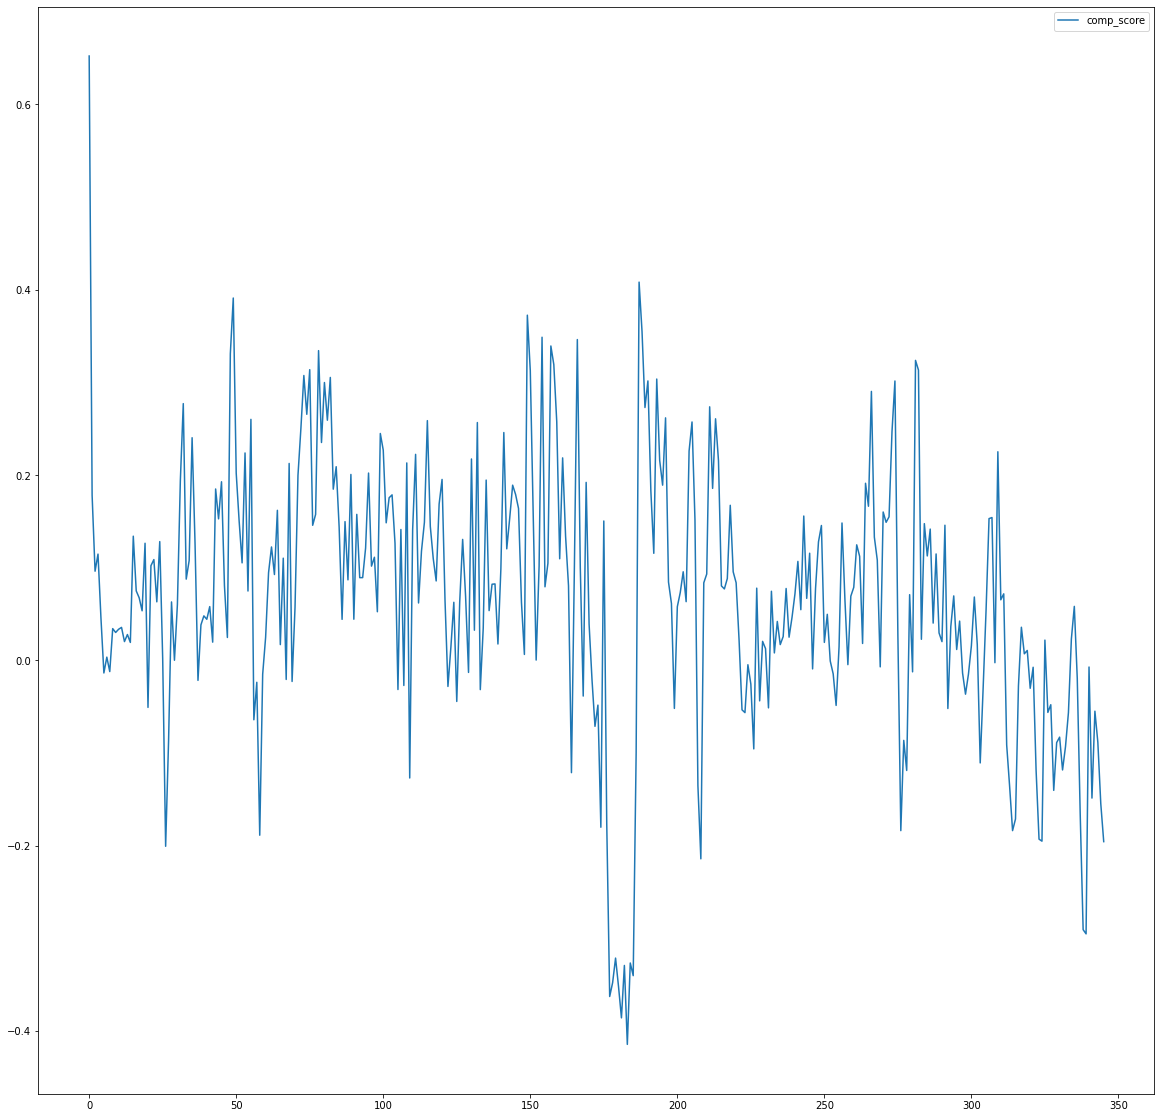

In [190]:
df.plot(figsize=(20, 20))
df2.plot(figsize=(20, 20))
df3.plot(figsize=(20, 20))

<AxesSubplot:xlabel='time'>

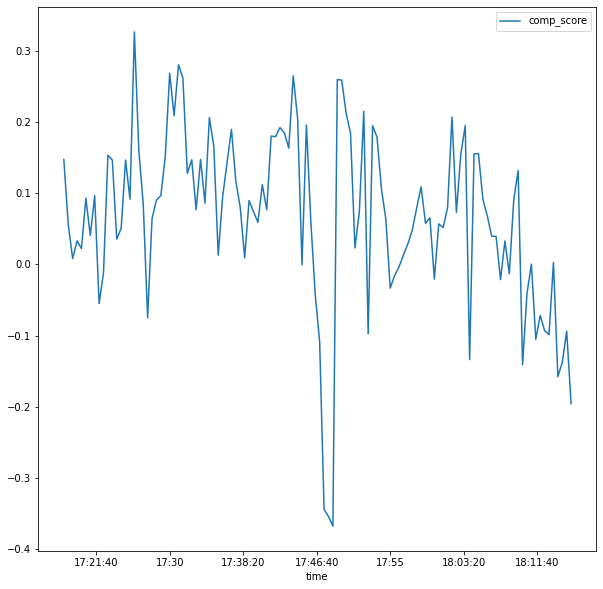

In [191]:
df30.plot(figsize=(10, 10))

In [218]:
len(df30)

116

In [251]:
test_size = 18

test_index = len(df30) - test_size

In [253]:
test_index

98

In [254]:
test_size

18

In [262]:
train = df.iloc[:test_index]

In [263]:
len(train)

58

In [259]:
train.tail()

,Date,comp_score
53,2021-10-18 18:11:00,-0.053400
54,2021-10-18 18:12:00,-0.082629
55,2021-10-18 18:13:00,-0.045777
56,2021-10-18 18:14:00,-0.148251
57,2021-10-18 18:15:00,-0.099078


In [243]:
test = df.iloc[test_index:]

In [244]:
len(test)

0

In [119]:
test.tail()

,Date,comp_score


In [167]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [168]:
length = 12  # This would be the length of our batches

In [169]:
generator = TimeseriesGenerator(train, train,
                               length = length, batch_size=1)

In [170]:
len(generator)

70

In [172]:
X, y = generator[0.0]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0.0] of type float64